# **# 3**
애플의 12월의 주가를 예측하는 선형회귀 모델 만들기 & MSE 값 구하기

In [ ]:
import numpy as np

# 임의의 시작 기울기와 절편
rand_ab=[2,125]

# x값과 y값
data = [[1,130],[3,128],[5,132],[7,140],[9,153],[11,150]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b에 a, b값 대입하여 예측 결과를 출력하는 함수
def predict(x):
  return rand_ab[0]*x + rand_ab[1]

# MSE 함수 공식
def mse(y,y_hat):
  return ((y-y_hat)**2).mean()

# MSE 함수를 각 y값에 대입하여 최종 값을 구하는 함수
def mse_val(p,y):
  return mse(np.array(p),np.array(y))

# 예측값이 들어갈 빈 리스트
predList=[]

# 모든 x값을 한 번씩 대입하여 predList 리스트 완성
for i in range(len(x)):
  predList.append(predict(x[i]))
  print("%d 월 주가 = %d, 예측 주가 = %d" %(x[i], y[i], predict(x[i])))

# 최종 출력
print("최종 mse :",mse_val(predList,y))
print("12월 예상 주가 :",predict(12))

1 월 주가 = 130, 예측 주가 = 127
3 월 주가 = 128, 예측 주가 = 131
5 월 주가 = 132, 예측 주가 = 135
7 월 주가 = 140, 예측 주가 = 139
9 월 주가 = 153, 예측 주가 = 143
11 월 주가 = 150, 예측 주가 = 147
최종 mse : 22.833333333333332
12월 예상 주가 : 149


# **# 5**

K-최근접 Wine 데이터 실습

책에서 쓰이는 와인데이터로 KNN(K-최근접) 실습

**와인 데이터 불러오기**

In [ ]:
import pandas as pd
wine = pd.read_csv("http://bit.ly/wine-date")

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


**시각화해보기**
seaborn, matplotlib을 이용해서 alcohol, sugar, pH를 시각화

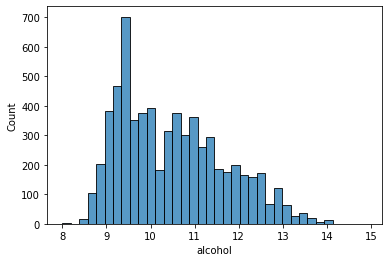

In [ ]:
# seaborn의 histplot, countplot을 이용해서 값의 분포와 개수를 확인해보기
import seaborn as sns
import matplotlib.pyplot as plt

# alcohol 히스토그램으로 그려보기
sns.histplot(data=wine, x='alcohol')

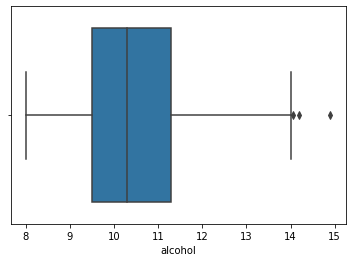

In [ ]:
# alcohol 값의 분포를 boxplot으로 그려보기
sns.boxplot(data=wine,x='alcohol')

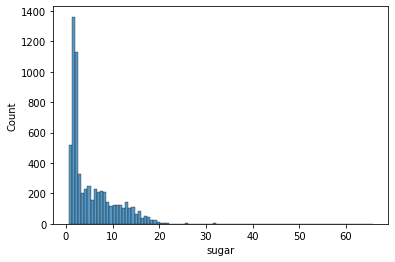

In [ ]:
# sugar 히스토그램으로 그려보기
sns.histplot(data=wine, x='sugar')

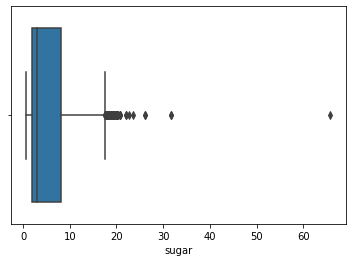

In [ ]:
# sugar 값의 분포를 boxplot으로 그려보기
sns.boxplot(data=wine,x='sugar')

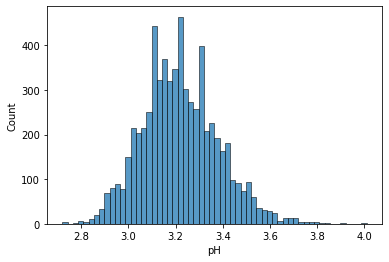

In [ ]:
# pH 히스토그램으로 그려보기
sns.histplot(data=wine, x='pH')

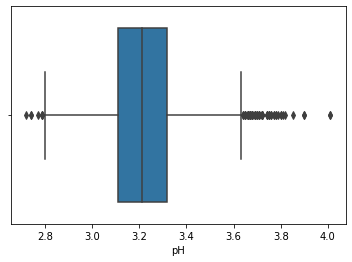

In [ ]:
# pH 값의 분포를 boxplot으로 그려보기
sns.boxplot(data=wine, x='pH')

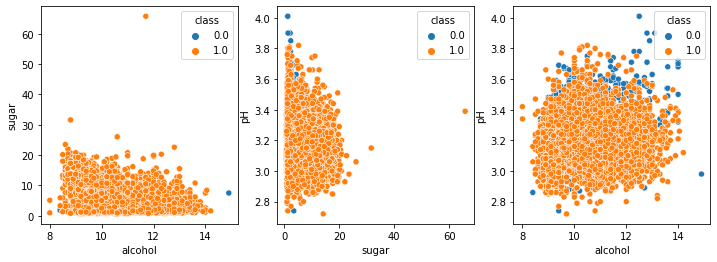

In [ ]:
# target값 확인해보기 : feature들과 target값의 관계는 어떨까?
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.scatterplot(x='alcohol',y='sugar',data=wine,hue='class')
plt.subplot(132)
sns.scatterplot(x='sugar',y='pH',data=wine,hue='class')
plt.subplot(133)
sns.scatterplot(x='alcohol',y='pH',data=wine,hue='class')

**훈련 데이터, 테스트 데이터로 나누기**

In [ ]:
# alcohol, sugar, pH를 feature로 / class를 target으로
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

# 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target,random_state=42)


(4872, 3) (1625, 3)


**전처리**
스케일링을 적용해보기

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

# 표준점수
train_scaled = (train_input - mean) / std

**모델링**
KNN 분류를 사용해 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target) # 모델 훈련
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target) # 평가

0.8344615384615385